<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Actividad 4: Redes Neuronales Recurrentes (forecasting)
    
___

<div class="alert alert-success">
Estadísticas de Tráfico Aéreo de Pasajeros:
    
Esta actividad consiste en obtener un modelo RNN para los datos "international-airline-passengers.csv". Este dataset contiene un informe del Aeropuerto Internacional de San Francisco sobre estadísticas mensuales de tráfico de pasajeros por aerolínea. Los datos del aeropuerto son estacionales por naturaleza, por lo tanto, cualquier análisis comparativo debe realizarse de un período a otro (es decir, enero de 2010 frente a enero de 2009) y no de un período a otro (es decir, enero de 2010 frente a febrero de 2010). 
</div>


### Cargar los datos

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('Data/international-airline-passengers.csv')

### Explorar los datos

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Month                                                                           145 non-null    object 
 1   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [4]:
dataset.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [5]:
dataset.tail()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [6]:
dataset.dropna(inplace=True)

In [7]:
dataset.tail()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


### Obtner los datos para el entrenamiento

In [8]:
train = dataset.iloc[:,1].values
train

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312., 274., 237., 278., 284., 277., 317., 313.,
       318., 374., 413., 405., 355., 306., 271., 306., 315., 301., 356.,
       348., 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
       362., 348., 363., 435., 491., 505., 404., 359., 310., 337., 360.,
       342., 406., 396., 420., 472., 548., 559., 463., 407., 362., 405.,
       417., 391., 419., 461., 472., 535., 622., 606., 508., 461., 390.,
       432.])

In [9]:
train = train.reshape(train.shape[0],1)
train

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

### Preprocemaniento de datos

In [10]:
# escalamiento de los datos (MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler(feature_range = (0,1))
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [26]:
import matplotlib.pyplot as plt


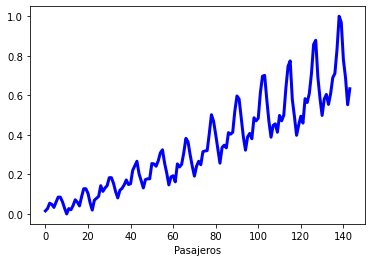

In [27]:
plt.figure(figsize=(6,4))
plt.plot(train_scaled, c='b', lw=3)
plt.xlabel('Meses')
plt.xlabel('Pasajeros')
plt.show()

### Crear la estructura de datos

La principal adaptación que se necesita hacer para aplicar modelos de deep learning a problemas de forecasting es transformar la serie temporal en un matriz en la que, cada valor, está asociado a la ventana temporal (lags) que le precede.


<img src="Figures/transform_timeseries.gif" alt="Grayscale Image" width="700">


In [28]:
train_scaled.shape[0]

144

In [29]:
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, train_scaled.shape[0]):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])

X_train = np.array(X_train)
y_train = np.array(y_train)

In [30]:
X_train.shape

(94, 50)

In [32]:
#reshape del X_train
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_train.shape


(94, 50, 1)

In [33]:
X_train

array([[[0.01544402],
        [0.02702703],
        [0.05405405],
        ...,
        [0.17374517],
        [0.17760618],
        [0.17760618]],

       [[0.02702703],
        [0.05405405],
        [0.04826255],
        ...,
        [0.17760618],
        [0.17760618],
        [0.25482625]],

       [[0.05405405],
        [0.04826255],
        [0.03281853],
        ...,
        [0.17760618],
        [0.25482625],
        [0.25289575]],

       ...,

       [[0.58108108],
        [0.48455598],
        [0.38996139],
        ...,
        [1.        ],
        [0.96911197],
        [0.77992278]],

       [[0.48455598],
        [0.38996139],
        [0.32239382],
        ...,
        [0.96911197],
        [0.77992278],
        [0.68918919]],

       [[0.38996139],
        [0.32239382],
        [0.38996139],
        ...,
        [0.77992278],
        [0.68918919],
        [0.55212355]]])

In [34]:
y_train

array([0.25482625, 0.25289575, 0.24131274, 0.26833977, 0.30888031,
       0.32432432, 0.25675676, 0.20656371, 0.14671815, 0.18725869,
       0.19305019, 0.16216216, 0.25289575, 0.23745174, 0.25096525,
       0.30888031, 0.38223938, 0.36486486, 0.2992278 , 0.24131274,
       0.19111969, 0.24131274, 0.26640927, 0.24903475, 0.31467181,
       0.31853282, 0.32046332, 0.40733591, 0.5019305 , 0.46911197,
       0.4015444 , 0.32818533, 0.25675676, 0.33590734, 0.34749035,
       0.33397683, 0.41119691, 0.4034749 , 0.41312741, 0.52123552,
       0.5965251 , 0.58108108, 0.48455598, 0.38996139, 0.32239382,
       0.38996139, 0.40733591, 0.38030888, 0.48648649, 0.47104247,
       0.48455598, 0.61389961, 0.6969112 , 0.7007722 , 0.57915058,
       0.46911197, 0.38803089, 0.44787645, 0.45559846, 0.41312741,
       0.4980695 , 0.47104247, 0.5       , 0.63899614, 0.74710425,
       0.77413127, 0.57915058, 0.49227799, 0.3976834 , 0.44980695,
       0.49420849, 0.45945946, 0.58301158, 0.56370656, 0.61003

### Crear un modelo de redes neuronales recurrentes

<div class="alert alert-success">
  <strong>Task:</strong> Crear una RNN simple.
<ul>
  <li>capa SimpleRnn(units=50, act=tanh) -> dropout(0.2) -> SimpleRNN(units=50, act=tanh)-> dropout(0.2)->dense(units=1)</li>
  <li>Muestre un resumen de la red</li>
  <li>Compilar el modelo con `Adam` como el optimizador</li>
</ul>

</div>

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dropout


In [66]:
#inicializar la red
modelo_simple = Sequential()

modelo_simple.add(SimpleRNN(units=50, activation='tanh',return_sequences=True, input_shape = (X_train.shape[1],1)))
modelo_simple.add(Dropout(0.2))

modelo_simple.add(SimpleRNN(units=50, activation='tanh',return_sequences=True))
modelo_simple.add(Dropout(0.2))

modelo_simple.add(SimpleRNN(units=50, activation='tanh',return_sequences=True))
modelo_simple.add(Dropout(0.2))

modelo_simple.add(SimpleRNN(units=50))
modelo_simple.add(Dropout(0.2))

modelo_simple.add(Dense(units=1))

In [67]:
modelo_simple.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_12 (SimpleRNN)    (None, 50, 50)            2600      
_________________________________________________________________
dropout_12 (Dropout)         (None, 50, 50)            0         
_________________________________________________________________
simple_rnn_13 (SimpleRNN)    (None, 50, 50)            5050      
_________________________________________________________________
dropout_13 (Dropout)         (None, 50, 50)            0         
_________________________________________________________________
simple_rnn_14 (SimpleRNN)    (None, 50, 50)            5050      
_________________________________________________________________
dropout_14 (Dropout)         (None, 50, 50)            0         
_________________________________________________________________
simple_rnn_15 (SimpleRNN)    (None, 50)               

In [68]:
# compilar el modelo
modelo_simple.compile(optimizer='adam', loss='mean_squared_error')


### Entrenar el modelo

<div class="alert alert-success">
  <strong>Task:</strong> : Entrene el modelo creado en la celda anterior en CIFAR10.
  <ul>
  <li>Entrena la red usando `epochs = 100`</li>
  <li>Entrena la red usando un `batch_size = 32`</li>
  <li>Usa `validation_split = 0.2` cuando llames a `fit()`</li>
 
</ul>

</div>

In [69]:
# Entrenemiento de la red
modelo_simple.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 0s 127ms/step - loss: 0.4696 - val_loss: 0.5866
Epoch 2/100
3/3 [==============================] - 0s 23ms/step - loss: 0.5397 - val_loss: 0.0988
Epoch 3/100
3/3 [==============================] - 0s 25ms/step - loss: 0.4477 - val_loss: 0.0411
Epoch 4/100
3/3 [==============================] - 0s 22ms/step - loss: 0.3633 - val_loss: 0.1241
Epoch 5/100
3/3 [==============================] - 0s 23ms/step - loss: 0.4774 - val_loss: 0.0925
Epoch 6/100
3/3 [==============================] - 0s 22ms/step - loss: 0.4835 - val_loss: 0.0364
Epoch 7/100
3/3 [==============================] - 0s 22ms/step - loss: 0.3116 - val_loss: 0.0986
Epoch 8/100
3/3 [==============================] - 0s 22ms/step - loss: 0.3482 - val_loss: 0.5075
Epoch 9/100
3/3 [==============================] - 0s 21ms/step - loss: 0.3333 - val_loss: 0.5378
Epoch 10/100
3/3 [==============================] - 0s 24ms/step - loss: 0.3144 - val_loss: 0.2061
Epoch 11/100
3/3 [

Epoch 84/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0845 - val_loss: 0.0195
Epoch 85/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0752 - val_loss: 0.0152
Epoch 86/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0765 - val_loss: 0.0207
Epoch 87/100
3/3 [==============================] - 0s 24ms/step - loss: 0.1031 - val_loss: 0.0431
Epoch 88/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0911 - val_loss: 0.0320
Epoch 89/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0885 - val_loss: 0.0140
Epoch 90/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0846 - val_loss: 0.0124
Epoch 91/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0787 - val_loss: 0.0202
Epoch 92/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0601 - val_loss: 0.0361
Epoch 93/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0873 - val_loss: 0.0167
Epoch 94/1

### Predicción y visualización del modelo RNN


In [70]:
dataset_test = pd.read_csv('Data/international-airline-passengers.csv')
dataset_test.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [71]:
dataset_test.dropna(inplace=True)

In [72]:
real_data = dataset_test.loc[:,['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60']].values
real_data

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [73]:
dataset_total = pd.concat((dataset['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'],
                           dataset_test['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60']))

In [74]:
inputs =dataset_total[len(dataset_total) - len(dataset_test) - timesteps :].values.reshape(-1,1)
inputs

array([[271.],
       [306.],
       [315.],
       [301.],
       [356.],
       [348.],
       [355.],
       [422.],
       [465.],
       [467.],
       [404.],
       [347.],
       [305.],
       [336.],
       [340.],
       [318.],
       [362.],
       [348.],
       [363.],
       [435.],
       [491.],
       [505.],
       [404.],
       [359.],
       [310.],
       [337.],
       [360.],
       [342.],
       [406.],
       [396.],
       [420.],
       [472.],
       [548.],
       [559.],
       [463.],
       [407.],
       [362.],
       [405.],
       [417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.],
       [622.],
       [606.],
       [508.],
       [461.],
       [390.],
       [432.],
       [112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [12

In [75]:
inputs = scaler.transform(inputs)
inputs

array([[0.32239382],
       [0.38996139],
       [0.40733591],
       [0.38030888],
       [0.48648649],
       [0.47104247],
       [0.48455598],
       [0.61389961],
       [0.6969112 ],
       [0.7007722 ],
       [0.57915058],
       [0.46911197],
       [0.38803089],
       [0.44787645],
       [0.45559846],
       [0.41312741],
       [0.4980695 ],
       [0.47104247],
       [0.5       ],
       [0.63899614],
       [0.74710425],
       [0.77413127],
       [0.57915058],
       [0.49227799],
       [0.3976834 ],
       [0.44980695],
       [0.49420849],
       [0.45945946],
       [0.58301158],
       [0.56370656],
       [0.61003861],
       [0.71042471],
       [0.85714286],
       [0.87837838],
       [0.69305019],
       [0.58494208],
       [0.4980695 ],
       [0.58108108],
       [0.6042471 ],
       [0.55405405],
       [0.60810811],
       [0.68918919],
       [0.71042471],
       [0.83204633],
       [1.        ],
       [0.96911197],
       [0.77992278],
       [0.689

In [76]:
inputs.shape

(194, 1)

In [77]:
X_test=[]
for i in range(timesteps,inputs.shape[0]):
    X_test.append(inputs[i-timesteps:i,0])

X_test=np.array(X_test)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
    

In [78]:
X_test

array([[[0.32239382],
        [0.38996139],
        [0.40733591],
        ...,
        [0.68918919],
        [0.55212355],
        [0.63320463]],

       [[0.38996139],
        [0.40733591],
        [0.38030888],
        ...,
        [0.55212355],
        [0.63320463],
        [0.01544402]],

       [[0.40733591],
        [0.38030888],
        [0.48648649],
        ...,
        [0.63320463],
        [0.01544402],
        [0.02702703]],

       ...,

       [[0.58108108],
        [0.48455598],
        [0.38996139],
        ...,
        [1.        ],
        [0.96911197],
        [0.77992278]],

       [[0.48455598],
        [0.38996139],
        [0.32239382],
        ...,
        [0.96911197],
        [0.77992278],
        [0.68918919]],

       [[0.38996139],
        [0.32239382],
        [0.38996139],
        ...,
        [0.77992278],
        [0.68918919],
        [0.55212355]]])

In [79]:
predictions = modelo_simple.predict(X_test)


In [80]:
predictions.shape

(144, 1)

In [81]:
predictions = scaler.inverse_transform(predictions.reshape(predictions.shape[0],predictions.shape[1]))
predictions

array([[486.1502 ],
       [505.15787],
       [477.48184],
       [428.35724],
       [445.0608 ],
       [444.5371 ],
       [480.69482],
       [484.2449 ],
       [468.29712],
       [402.98392],
       [305.09232],
       [279.07724],
       [259.91345],
       [248.13171],
       [207.1713 ],
       [168.32242],
       [231.9463 ],
       [243.28658],
       [325.68735],
       [280.42746],
       [235.20346],
       [279.85663],
       [307.26773],
       [329.3778 ],
       [342.2196 ],
       [286.60712],
       [218.48145],
       [240.20282],
       [287.6715 ],
       [336.20108],
       [286.35056],
       [234.44327],
       [195.79247],
       [207.91466],
       [258.78885],
       [235.7591 ],
       [195.03342],
       [193.36029],
       [228.4405 ],
       [258.4711 ],
       [305.3632 ],
       [309.6856 ],
       [294.08737],
       [318.09174],
       [324.85074],
       [290.4851 ],
       [285.69006],
       [267.22043],
       [246.10547],
       [282.29083],


In [82]:
import matplotlib.pyplot as plt

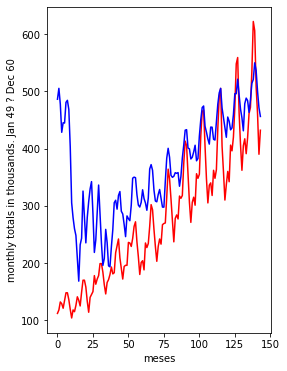

In [85]:
plt.figure(figsize=(4,6))
plt.plot(real_data, color='r', label='Valores reales')
plt.plot(predictions, color= 'b', label='predicciones')
plt.xlabel('meses')
plt.ylabel('monthly totals in thousands. Jan 49 ? Dec 60')
plt.show()

### 2.- Creación de un LSTM

### Cargar datos

In [131]:
data = pd.read_csv('Data/international-airline-passengers.csv')
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [132]:
data = data.iloc[:,1].values
data

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312., 274., 237., 278., 284., 277., 317., 313.,
       318., 374., 413., 405., 355., 306., 271., 306., 315., 301., 356.,
       348., 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
       362., 348., 363., 435., 491., 505., 404., 359., 310., 337., 360.,
       342., 406., 396., 420., 472., 548., 559., 463., 407., 362., 405.,
       417., 391., 419., 461., 472., 535., 622., 606., 508., 461., 390.,
       432.,  nan])

### Preprocesamiento de datos

In [133]:
data = data.reshape(-1,1)
scaler=MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [135]:
train_size=int(len(data)*0.5)
test_size=len(data) - train_size

In [136]:
train = data_scaled[0:train_size,:]
test = data_scaled[train_size:len(data),:]

In [137]:
len(train),len(test)

(72, 73)

### Crear la estructura de datos

In [138]:
timesteps=20

In [139]:
X_train = []
y_train = []


for i in range(timesteps, train.shape[0]):
    X_train.append(train[i-timesteps:i,0])
    y_train.append(train[i,0])

X_test = []
y_test = []


for i in range(timesteps, test.shape[0]):
    X_test.append(test[i-timesteps:i,0])
    y_test.append(test[i,0])
    
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [140]:
X_train.shape

(52, 20)

In [141]:
X_test.shape

(53, 20)

In [142]:
X_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

In [143]:
    X_train.shape

(52, 1, 20)

In [144]:
X_test.shape

(53, 1, 20)

### Crear un modelo de redes neuronales recurrentes LSTM

<div class="alert alert-success">
  <strong>Task:</strong> Crear una RNN simple.
<ul>
  <li>capa LSTM(units=10, act=tanh) -> dense(units=1)</li>
  <li>Muestre un resumen de la red</li>
  <li>Compilar el modelo con `Adam` como el optimizador loss=`mean_squared_error`</li>
</ul>

</div>

In [145]:
from tensorflow.keras.layers import LSTM

In [146]:
# modelo lstm
model_lstm = Sequential()
model_lstm.add(LSTM(10,input_shape=(1,timesteps)))
model_lstm.add(Dense(1))


In [147]:
model_lstm.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 10)                1240      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________


In [148]:
#compilar el modelo
model_lstm.compile(loss='mean_squared_error', optimizer='adam')


In [149]:
#entrenar la red LSTM
model_lstm.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
52/52 [==============================] - 0s 1000us/step - loss: 0.0131
Epoch 2/50
52/52 [==============================] - 0s 923us/step - loss: 0.0032
Epoch 3/50
52/52 [==============================] - 0s 923us/step - loss: 0.0029
Epoch 4/50
52/52 [==============================] - 0s 846us/step - loss: 0.0028
Epoch 5/50
52/52 [==============================] - 0s 904us/step - loss: 0.0025
Epoch 6/50
52/52 [==============================] - 0s 846us/step - loss: 0.0025
Epoch 7/50
52/52 [==============================] - 0s 885us/step - loss: 0.0020
Epoch 8/50
52/52 [==============================] - 0s 904us/step - loss: 0.0020
Epoch 9/50
52/52 [==============================] - 0s 942us/step - loss: 0.0017
Epoch 10/50
52/52 [==============================] - 0s 923us/step - loss: 0.0016
Epoch 11/50
52/52 [==============================] - 0s 917us/step - loss: 0.0013
Epoch 12/50
52/52 [==============================] - 0s 888us/step - loss: 0.0013
Epoch 13/50
52/52 [=====

### Predicción

In [153]:
trainPredict = model_lstm.predict(X_train)
testPredict = model_lstm.predict(X_test)

In [154]:
#caler_inversetransform
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

In [157]:
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[timesteps:len(trainPredict) + timesteps,:]=trainPredict


ValueError: could not broadcast input array from shape (53,1) into shape (50,1)

In [164]:

testPredictPlot = np.empty_like(data)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(trainPredict) +(timesteps*2):len(data),:]=testPredict


In [165]:
testPredictPlot.shape

(145, 1)

In [159]:
data

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

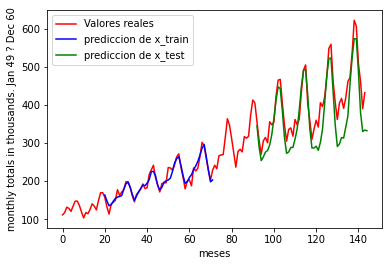

In [167]:
plt.figure(figsize=(6,4))
plt.plot(data, color='r', label='Valores reales')
plt.plot(trainPredictPlot, color='b', label='prediccion de x_train')
plt.plot(testPredictPlot, color='g', label='prediccion de x_test')
#plt.plot(predictions, color= 'b', label='predicciones')
plt.xlabel('meses')
plt.ylabel('monthly totals in thousands. Jan 49 ? Dec 60')
plt.legend(loc='best')
plt.show()